# EDA Inicial de Comentarios sobre la Guerra en Ucrania (YouTube 2024)


Este notebook realiza un **análisis exploratorio** de los comentarios extraídos, con el objetivo de:

- Analiza la distribución de comentarios por canal y postura (`condiciones_cuenta`)
- Visualiza el volumen de comentarios a lo largo del tiempo
- Examina la longitud de los comentarios como posible indicador de bots o usuarios activos
- Prepara el dataset para análisis de texto, clustering y minería posterior
    

In [2]:
# Carga librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Definición de colores para las categorías
colors = {
    'noticiero': 'grey',
    'pro-ruso':   'red',
    'pro-ucraniano': 'blue'
}

In [5]:
# Carga comentarios ya limpios
df = pd.read_csv("../data/processed/1_comments_youtube_clean.csv")
print(f"Total de comentarios: {len(df)}")
df.head()

Total de comentarios: 113776


,comment_id,comment,comment_text_length,user_id,user_name,comment_time,comment_likes,total_reply_count,is_top_level_comment,video_title,...,video_duration,video_tags,video_category_id,relacion_evento,evento,tipo_evento,condiciones_cuenta,account_created_at,channel_id,subscriber_count
0,Ugy7XNqU8Smzq3GfBVF4AaABAg,Este se nota que cuando Rusia consigue algo en...,83,UCocb_0i4-sfZbAuA9oGXeUQ,@herrgottsir,2025-04-14T22:54:01Z,0,0,True,✅ RESUMEN de la SEMANA 142 de guerra entre UCR...,...,307.0,"['ucrania rusia guerra', 'guerra ucrania rusia...",27,directa,guerra ucrania,geopolitico,pro-ucraniano,2018-11-30T10:14:21Z,UCPH3Oz99Y_jrVBCQMjQZNSg,2520000
1,UgyZjQOfHF_EkutLxeR4AaABAg,"0:07 cuando terminara esta locura,,,ya Rusia g...",52,UCIOGqwO1MIR0hZ0d4Kyx73w,@davidtomasjaenbarsa172,2025-04-07T14:30:04Z,0,0,True,✅ RESUMEN de la SEMANA 142 de guerra entre UCR...,...,307.0,"['ucrania rusia guerra', 'guerra ucrania rusia...",27,directa,guerra ucrania,geopolitico,pro-ucraniano,2023-02-10T20:07:21.246157Z,UCPH3Oz99Y_jrVBCQMjQZNSg,2520000
2,UgwnBt4AkQC2dLUvzXx4AaABAg,"Hola como están, fíjense que el título está eq...",88,UCpVHHwi3SvCE19wxVlq7y6w,@gcr8844,2025-01-08T12:29:06Z,0,0,True,✅ RESUMEN de la SEMANA 142 de guerra entre UCR...,...,307.0,"['ucrania rusia guerra', 'guerra ucrania rusia...",27,directa,guerra ucrania,geopolitico,pro-ucraniano,2013-10-09T00:29:16Z,UCPH3Oz99Y_jrVBCQMjQZNSg,2520000
3,UgwYCwjSliYyUwjVKOp4AaABAg,Zzzzzz,6,UCTTwT8e9Q_KiFh3qf--YoKg,@xforce2001,2024-12-20T16:57:22Z,0,0,True,✅ RESUMEN de la SEMANA 142 de guerra entre UCR...,...,307.0,"['ucrania rusia guerra', 'guerra ucrania rusia...",27,directa,guerra ucrania,geopolitico,pro-ucraniano,2018-02-05T20:40:37Z,UCPH3Oz99Y_jrVBCQMjQZNSg,2520000
4,Ugyrvze7qQFTxB4gv0d4AaABAg,Vamos Rusia 😊,13,UCGjcyIO91D7-rLxigikXUyg,@Gaby_Gamer22,2024-12-08T20:01:22Z,1,0,True,✅ RESUMEN de la SEMANA 142 de guerra entre UCR...,...,307.0,"['ucrania rusia guerra', 'guerra ucrania rusia...",27,directa,guerra ucrania,geopolitico,pro-ucraniano,2020-11-27T04:57:57.605908Z,UCPH3Oz99Y_jrVBCQMjQZNSg,2520000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113776 entries, 0 to 113775
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comment_id            113776 non-null  object 
 1   comment               113728 non-null  object 
 2   comment_text_length   113776 non-null  int64  
 3   user_id               113776 non-null  object 
 4   user_name             113633 non-null  object 
 5   comment_time          113776 non-null  object 
 6   comment_likes         113776 non-null  int64  
 7   total_reply_count     113776 non-null  int64  
 8   is_top_level_comment  113776 non-null  bool   
 9   video_title           113776 non-null  object 
 10  channel_title         113776 non-null  object 
 11  video_published_at    113776 non-null  object 
 12  video_views           113776 non-null  int64  
 13  video_likes           113776 non-null  int64  
 14  video_duration        113776 non-null  float64
 15  

In [7]:
# Eliminar registros donde falta el texto del comentario o el nombre del usuario
df = df.dropna(subset=["user_name"]).copy()
df = df.dropna(subset=["comment"]).copy()

# Opcional: mostrar la nueva cantidad de registros
print(f"Dataset limpio: {df.shape[0]} registros restantes")


Dataset limpio: 113585 registros restantes


In [8]:
df_deduplicated = df.drop_duplicates(subset=["comment_id"])
print(f"Comentarios únicos: {len(df_deduplicated)}")

Comentarios únicos: 113585


In [9]:
df_deduplicated.describe().T

,count,mean,std,min,25%,50%,75%,max
comment_text_length,113585.0,1.314548e+02,203.812459,1.0,43.0,83.0,152.0,8282.0
comment_likes,113585.0,4.468345e+00,25.974235,0.0,0.0,0.0,1.0,1749.0
total_reply_count,113585.0,6.202844e-01,3.758295,0.0,0.0,0.0,0.0,300.0
video_views,113585.0,2.825201e+05,241448.421073,284.0,156663.0,228653.0,316479.0,1398815.0
video_likes,113585.0,1.310958e+04,9004.367737,0.0,4148.0,14926.0,18110.0,34041.0
video_duration,113585.0,1.513303e+03,2306.661093,8.0,123.0,365.0,2330.0,41658.0
video_category_id,113585.0,2.555770e+01,0.896870,25.0,25.0,25.0,27.0,27.0
subscriber_count,113585.0,1.649789e+06,935424.118983,329000.0,574000.0,2110000.0,2520000.0,3030000.0


In [10]:
# Conversión de fechas y orden temporal
df_deduplicated = df_deduplicated.assign(
    comment_time=pd.to_datetime(df_deduplicated["comment_time"], errors="coerce", utc=True),
    video_published_at=pd.to_datetime(df_deduplicated["video_published_at"], errors="coerce", utc=True)
)


In [11]:
df_deduplicated = df_deduplicated.assign(
    account_created_at=pd.to_datetime(
        df_deduplicated["account_created_at"],
        format="%Y-%m-%dT%H:%M:%S.%fZ",
        errors="coerce",
        utc=True
    )
)


In [ ]:

# Calcula días desde creación y filtra negativos sin warnings
df_deduplicated = (
    df_deduplicated
    .assign(days_since_account_creation=(df_deduplicated["comment_time"] - df_deduplicated["account_created_at"]).dt.days)
    .loc[
        lambda d: d["days_since_account_creation"].isna() | (d["days_since_account_creation"] >= 0)
    ]
    .copy()
)

print(df_deduplicated["days_since_account_creation"].describe())


count    53843.000000
mean       789.998013
std        541.696498
min          0.000000
25%        298.000000
50%        725.000000
75%       1273.000000
max       1962.000000
Name: days_since_account_creation, dtype: float64


In [13]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113583 entries, 0 to 113775
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   comment_id                   113583 non-null  object             
 1   comment                      113583 non-null  object             
 2   comment_text_length          113583 non-null  int64              
 3   user_id                      113583 non-null  object             
 4   user_name                    113583 non-null  object             
 5   comment_time                 113583 non-null  datetime64[ns, UTC]
 6   comment_likes                113583 non-null  int64              
 7   total_reply_count            113583 non-null  int64              
 8   is_top_level_comment         113583 non-null  bool               
 9   video_title                  113583 non-null  object             
 10  channel_title                113583 n

## Distribución por canal y postura ideológica

<Figure size 1200x800 with 0 Axes>

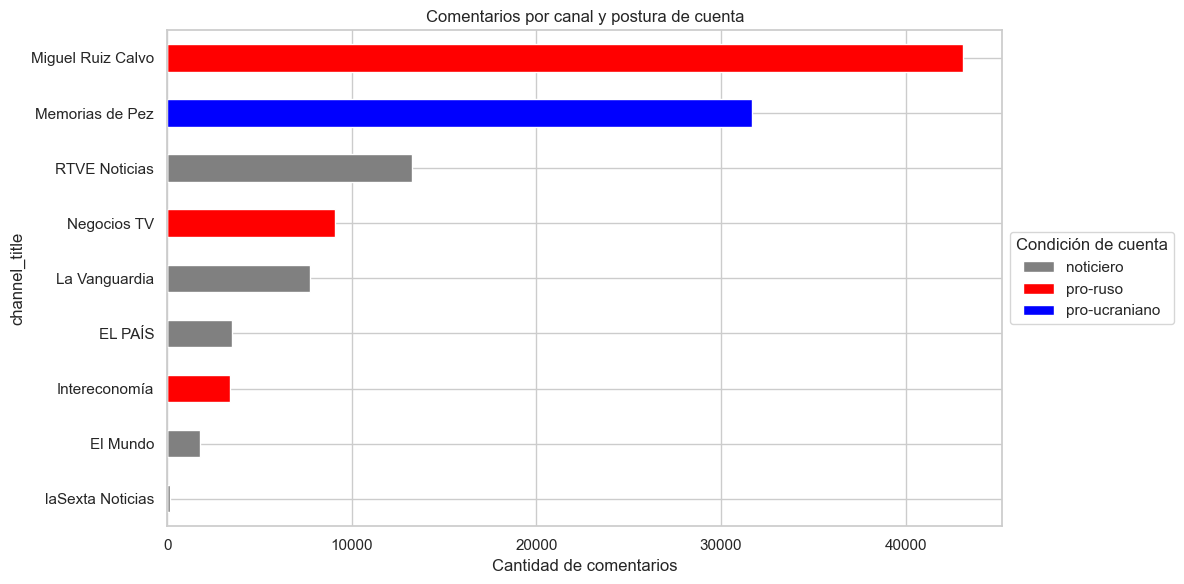

In [14]:
# 1) Agrupar y contar comentarios por canal y condición de cuenta
channel_counts = (
    df_deduplicated
    .groupby(['channel_title', 'condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# 2) Ordenar canales por total de comentarios
channel_counts['total'] = channel_counts.sum(axis=1)
channel_counts = channel_counts.sort_values('total', ascending=True).drop(columns='total')

# 3) Graficar barras horizontales apiladas
plt.figure(figsize=(12, 8))
channel_counts.plot(
    kind='barh',
    stacked=True,
    color=[colors[c] for c in channel_counts.columns]
)
plt.xlabel("Cantidad de comentarios")
plt.title("Comentarios por canal y postura de cuenta")
plt.legend(title="Condición de cuenta", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

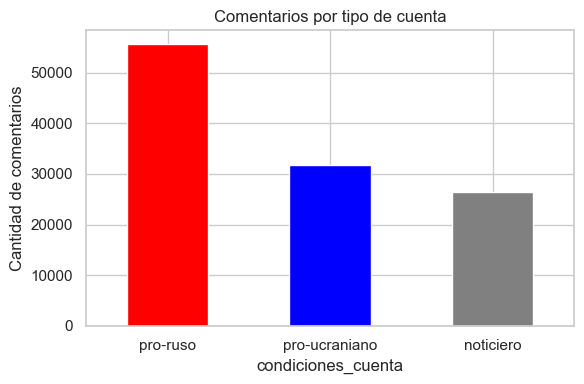

In [15]:
# Gráfico de barras x tipo de cuenta
counts = df_deduplicated['condiciones_cuenta'].value_counts()
plt.figure(figsize=(6,4))
counts.plot(
    kind='bar',
    color=[colors[c] for c in counts.index],
    title='Comentarios por tipo de cuenta'
)
plt.ylabel("Cantidad de comentarios")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Timeline de comentarios

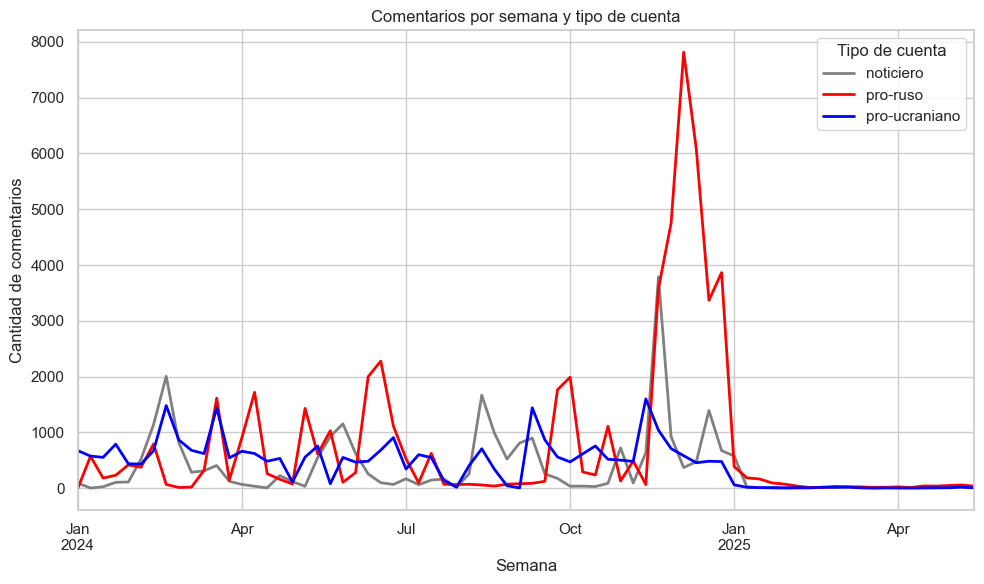

In [16]:
# Agrupar por semana y por tipo de cuenta
timeline = (
    df_deduplicated
    .groupby([pd.Grouper(key='comment_time', freq='W'), 'condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# Graficar líneas por categoría
plt.figure(figsize=(10, 6))
timeline.plot(
    ax=plt.gca(),
    color=[colors[c] for c in timeline.columns],
    linewidth=2
)
plt.title("Comentarios por semana y tipo de cuenta")
plt.ylabel("Cantidad de comentarios")
plt.xlabel("Semana")
plt.legend(title="Tipo de cuenta")
plt.tight_layout()
plt.show()


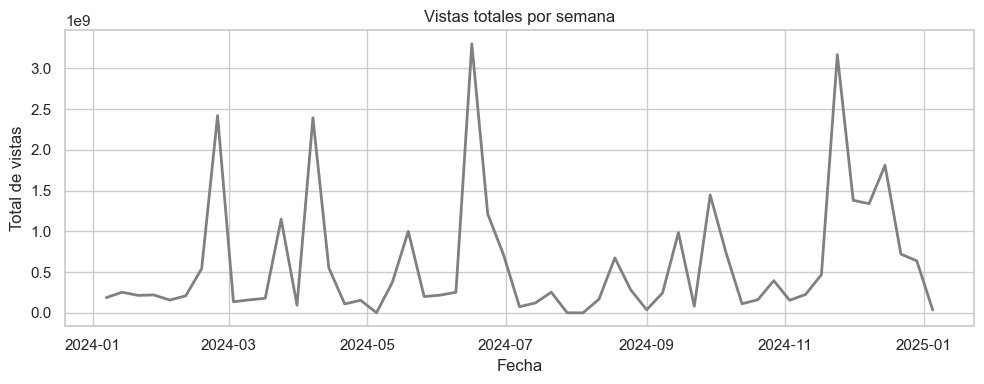

In [17]:
# Timeline de vistas por semana (línea única, color neutro)
vistas_por_semana = df_deduplicated.set_index("video_published_at").resample("W")["video_views"].sum()

plt.figure(figsize=(10, 4))
plt.plot(vistas_por_semana.index, vistas_por_semana.values, color=colors['noticiero'], linewidth=2)
plt.title("Vistas totales por semana")
plt.ylabel("Total de vistas")
plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28224\541273814.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M') \


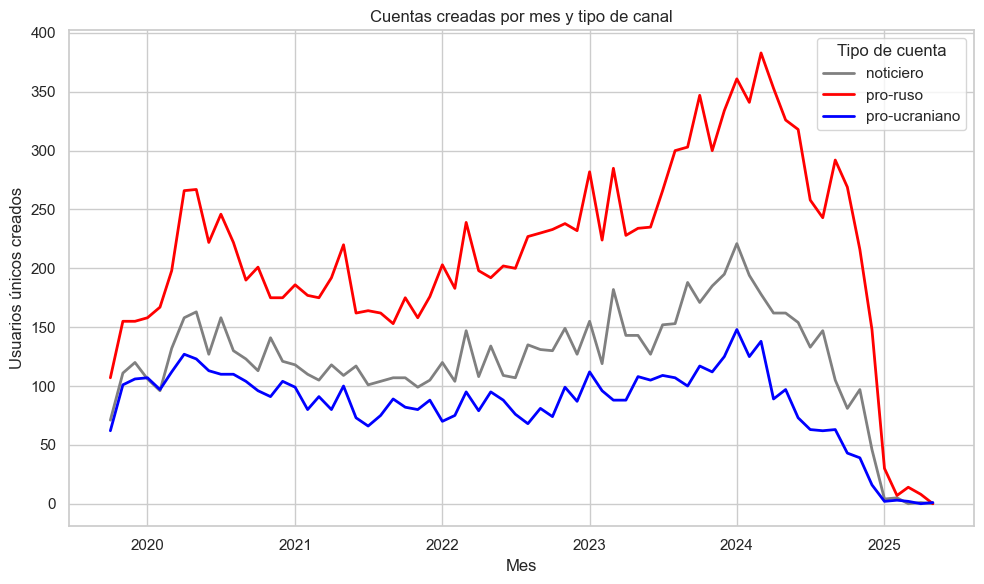

In [19]:
# 1) Deduplicar usuarios por condición y quedarnos con su account_created_at
unique_users = (
    df_deduplicated[['user_id','condiciones_cuenta','account_created_at']]
      .dropna(subset=['account_created_at'])
      .drop_duplicates(subset=['user_id','condiciones_cuenta'])
)

# 2) Convertir a periodo mensual (puedes usar 'D' si prefieres diario)
unique_users['month'] = unique_users['account_created_at'] \
    .dt.to_period('M') \
    .dt.to_timestamp()

# 3) Contar nuevos usuarios únicos por mes y condición
counts = (
    unique_users
    .groupby(['month','condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# 4) Graficar líneas
plt.figure(figsize=(10,6))
for cat, col in colors.items():
    if cat in counts.columns:
        plt.plot(counts.index, counts[cat], label=cat, color=col, linewidth=2)

plt.title("Cuentas creadas por mes y tipo de canal")
plt.xlabel("Mes")
plt.ylabel("Usuarios únicos creados")
plt.legend(title="Tipo de cuenta")
plt.tight_layout()
plt.show()

## Comentarios por video y engagement

c:\Users\User\Desktop\Facu\Master_Espana\Master_UEMC\TFM\codigo\analisis_guerra_ucrania_youtube\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


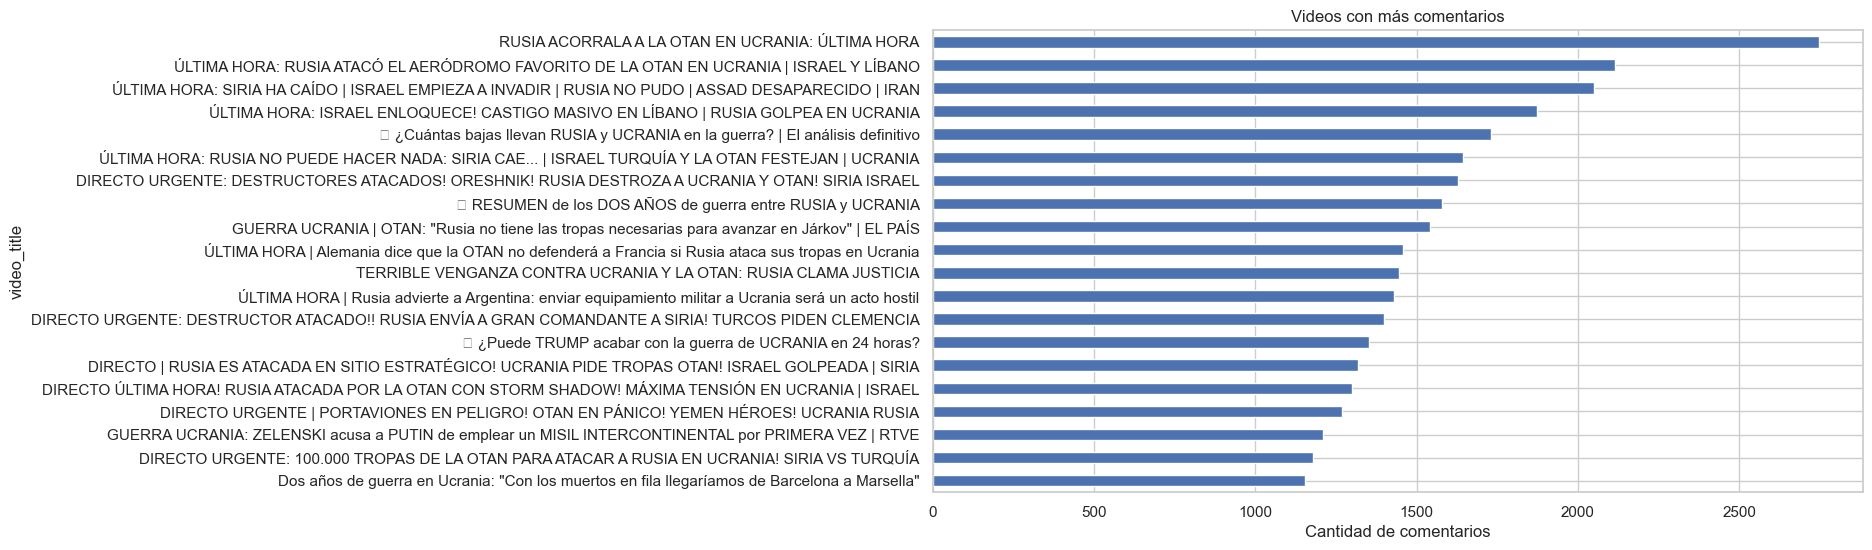

In [20]:
comentarios_por_video = df_deduplicated.groupby('video_title')['comment_id'].count().sort_values(ascending=False).head(20)
comentarios_por_video.plot(kind='barh', title="Videos con más comentarios")
plt.xlabel("Cantidad de comentarios")
plt.gca().invert_yaxis()
plt.show()

In [21]:
comentarios_por_video

video_title
RUSIA ACORRALA A LA OTAN EN UCRANIA: ÚLTIMA HORA                                                       2746
ÚLTIMA HORA: RUSIA ATACÓ EL AERÓDROMO FAVORITO DE LA OTAN EN UCRANIA | ISRAEL Y LÍBANO                 2116
ÚLTIMA HORA: SIRIA HA CAÍDO | ISRAEL EMPIEZA A INVADIR | RUSIA NO PUDO | ASSAD DESAPARECIDO | IRAN     2050
ÚLTIMA HORA: ISRAEL ENLOQUECE! CASTIGO MASIVO EN LÍBANO | RUSIA GOLPEA EN UCRANIA                      1874
✅ ¿Cuántas bajas llevan RUSIA y UCRANIA en la guerra? | El análisis definitivo                         1730
ÚLTIMA HORA: RUSIA NO PUEDE HACER NADA: SIRIA CAE... | ISRAEL TURQUÍA Y LA OTAN FESTEJAN | UCRANIA     1644
DIRECTO URGENTE: DESTRUCTORES ATACADOS! ORESHNIK! RUSIA DESTROZA A UCRANIA Y OTAN! SIRIA ISRAEL        1628
✅ RESUMEN de los DOS AÑOS de guerra entre RUSIA y UCRANIA                                              1579
GUERRA UCRANIA | OTAN: "Rusia no tiene las tropas necesarias para avanzar en Járkov" | EL PAÍS         1540
ÚLTIMA HORA | Al

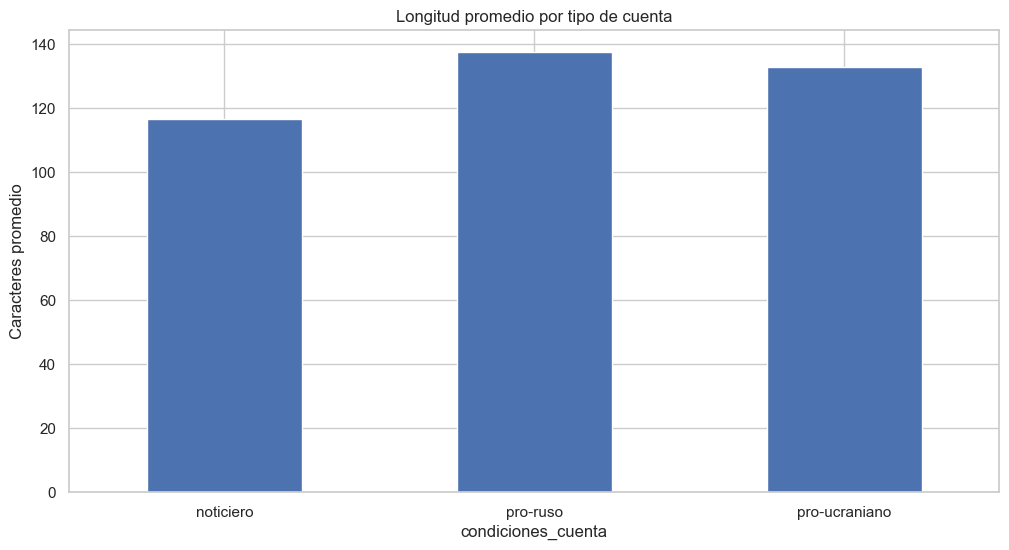

In [22]:
df_deduplicated.groupby("condiciones_cuenta")["comment_text_length"].mean().plot(kind='bar')
plt.title("Longitud promedio por tipo de cuenta")
plt.ylabel("Caracteres promedio")
plt.xticks(rotation=0)
plt.show()

In [23]:
top_canales_videos = (
    df_deduplicated.drop_duplicates(subset=["video_title", "channel_title", "video_published_at"])
    .groupby("channel_title")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_videos")
)


top_canales_vistas = (
    df_deduplicated.drop_duplicates(subset=["video_title", "channel_title", "video_published_at"])
    .groupby("channel_title")["video_views"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="vistas_totales")
)

# Top comentarios con más respuestas
top_comentarios_respuestas = (
    df_deduplicated.sort_values("total_reply_count", ascending=False)
    [["user_name", "comment", "total_reply_count", "video_title", "channel_title"]]
    .head(10)
)

# Top comentarios con más likes
top_comentarios_likes = (
    df_deduplicated.sort_values("comment_likes", ascending=False)
    [["user_name", "comment", "comment_likes", "video_title", "channel_title"]]
    .head(10)
)

# Top usuarios por cantidad de comentarios
top_usuarios_comentarios = (
    df_deduplicated.groupby("user_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_comentarios")
)

# Videos más comentados (por conteo en dataset)
top_videos_comentados = (
    df_deduplicated.groupby(["video_title", "channel_title"])
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_comentarios")
)


In [ ]:
top_canales_videos

In [24]:
top_canales_vistas

,channel_title,vistas_totales
0,Memorias de Pez,13206463
1,Miguel Ruiz Calvo,12598619
2,Negocios TV,5509898
3,RTVE Noticias,4156999
4,La Vanguardia,3186907
5,Intereconomía,2215138
6,EL PAÍS,1748063
7,El Mundo,478239
8,laSexta Noticias,21309


In [25]:
top_comentarios_respuestas

,user_name,comment,total_reply_count,video_title,channel_title
34218,@salvadorg8968,y hay gente que justifica estos bombardeos a c...,300,GUERRA UCRANIA | Periodistas captan en directo...,EL PAÍS
7547,@ultrazeroo280,Increíble que pasando tanto tiempo no pasará a...,133,✅ RESUMEN de los DOS AÑOS de guerra entre RUSI...,Memorias de Pez
58322,@12369875able,"changos, ahora Argentina ya no es el país más ...",130,ÚLTIMA HORA | Rusia advierte a Argentina: envi...,Negocios TV
64714,@MrodM.S,"Claro que Alemania no defenderia a nadie, si n...",128,ÚLTIMA HORA | Alemania dice que la OTAN no def...,Negocios TV
46628,@Timoleonoviedo,Putin hablando de buenas prácticas de guerra. ...,121,GUERRA UCRANIA: KIEV lanza ONCE DRONES contra ...,RTVE Noticias
9325,@yasmanydelgadoortega579,Cada día más decepcionante estos resúmenes 😢. ...,120,✅ RESUMEN de la SEMANA 137 de guerra entre UCR...,Memorias de Pez
34281,@manuelzambrano3481,Dice que putin no se quiere sentar a dialogar ...,117,"GUERRA UCRANIA | Zelenski asegura ""hará todo l...",EL PAÍS
58199,@miguelsantacruz4710,"Tenga mucho cuidado con Argentina, los peruano...",115,ÚLTIMA HORA | Rusia advierte a Argentina: envi...,Negocios TV
1198,@FRanarchistRM,Día 1000 de la operación militar especial de 3...,114,✅ RESUMEN de los 1.000 DÍAS de guerra entre RU...,Memorias de Pez
16393,@pes-cat5006,Porque necesita más personal ucrania si son lo...,113,✅ RESUMEN de la SEMANA 106 de la guerra entre ...,Memorias de Pez


In [26]:
top_comentarios_likes

,user_name,comment,comment_likes,video_title,channel_title
64733,@kevina7866,Algo de sentido común por fin,1749,ÚLTIMA HORA | Alemania dice que la OTAN no def...,Negocios TV
64655,@emilymontano9555,Que vaya sola Francia contra Rusia saldrá huy...,1425,ÚLTIMA HORA | Alemania dice que la OTAN no def...,Negocios TV
14484,@El_noe_bananero,No es que subestima a Europa.. es que sabe que...,1284,✅ ¿Puede TRUMP acabar con la guerra de UCRANIA...,Memorias de Pez
21979,@jameseclipse603,Las cosas deben estar bastante mal para Ucrani...,1169,✅RESUMEN de la SEMANA 104 de la guerra entre U...,Memorias de Pez
15864,@carmenmolamucho7892,Le acabas de destrozar el plan a Ucrania.🤦,1036,El nuevo plan de Ucrania 🇺🇦 para acabar con Ru...,Memorias de Pez
58310,@mrjustix7379,Milei queriendo pelear con Rusia que nunca les...,909,ÚLTIMA HORA | Rusia advierte a Argentina: envi...,Negocios TV
58322,@12369875able,"changos, ahora Argentina ya no es el país más ...",904,ÚLTIMA HORA | Rusia advierte a Argentina: envi...,Negocios TV
64664,@ChocoboGordo,Franceses siendo Franceses 😂😂😂😂 después estan ...,895,ÚLTIMA HORA | Alemania dice que la OTAN no def...,Negocios TV
52393,@quimt.6440,Nunca había visto nada semejante. Si no fuera ...,890,Así impactó sobre Dnipró el misil experimental...,La Vanguardia
5826,@rivera123v,"""Nunca se miente tanto como antes de las elecc...",890,✅ ¿Cuántas bajas llevan RUSIA y UCRANIA en la ...,Memorias de Pez


In [27]:
top_usuarios_comentarios

,user_name,cantidad_comentarios
0,@gregoriobenito5709,156
1,@AlexAntonioMarenco,152
2,@ivanortega6883,127
3,@adabentancur3086,104
4,@ivannajera9600,95
5,@loverofrusia4775,92
6,@wilsonchavez8788,90
7,@davidbarahona7279,77
8,@juaneduar1114,73
9,@dariops2777,73


In [28]:
# Asegurarse de que user_name no tenga nulos
df_deduplicated["user_name"] = df_deduplicated["user_name"].fillna("Usuario desconocido")

# Agrupación extendida
top_usuarios_comentarios = (
    df_deduplicated.groupby("user_name")
    .agg(
        cantidad_comentarios=("comment_id", "count"),
        cantidad_videos=("video_title", "nunique"),
        cantidad_canales=("channel_title", "nunique")
    )
    .sort_values("cantidad_comentarios", ascending=False)
    .head(10)
    .reset_index()
)

display(top_usuarios_comentarios)


,user_name,cantidad_comentarios,cantidad_videos,cantidad_canales
0,@gregoriobenito5709,156,28,2
1,@AlexAntonioMarenco,152,15,2
2,@ivanortega6883,127,46,5
3,@adabentancur3086,104,14,1
4,@ivannajera9600,95,40,2
5,@loverofrusia4775,92,27,1
6,@wilsonchavez8788,90,35,2
7,@davidbarahona7279,77,30,1
8,@juaneduar1114,73,31,1
9,@dariops2777,73,54,5


In [29]:
top_videos_comentados

,video_title,channel_title,cantidad_comentarios
0,RUSIA ACORRALA A LA OTAN EN UCRANIA: ÚLTIMA HORA,Miguel Ruiz Calvo,2746
1,ÚLTIMA HORA: RUSIA ATACÓ EL AERÓDROMO FAVORITO...,Miguel Ruiz Calvo,2116
2,ÚLTIMA HORA: SIRIA HA CAÍDO | ISRAEL EMPIEZA A...,Miguel Ruiz Calvo,2050
3,ÚLTIMA HORA: ISRAEL ENLOQUECE! CASTIGO MASIVO ...,Miguel Ruiz Calvo,1874
4,✅ ¿Cuántas bajas llevan RUSIA y UCRANIA en la ...,Memorias de Pez,1730
5,ÚLTIMA HORA: RUSIA NO PUEDE HACER NADA: SIRIA ...,Miguel Ruiz Calvo,1644
6,DIRECTO URGENTE: DESTRUCTORES ATACADOS! ORESHN...,Miguel Ruiz Calvo,1628
7,✅ RESUMEN de los DOS AÑOS de guerra entre RUSI...,Memorias de Pez,1579
8,"GUERRA UCRANIA | OTAN: ""Rusia no tiene las tro...",EL PAÍS,1540
9,ÚLTIMA HORA | Alemania dice que la OTAN no def...,Negocios TV,1457


In [30]:
# Guardar dataset limpio en la carpeta del proyecto
output_path = "../data/processed/2_comments_youtube_refined.csv"
df_deduplicated.to_csv(output_path, index=False)